<a href="https://colab.research.google.com/github/BlancoAnna/DL--2025/blob/main/Problems%207%20-%20Pretrained%20models%20and%20Finetuning/P7_PretrainedModelsFinetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/DL2024-25/blob/main/Problems%207%20-%20Pretrained%20Models%20and%20finetuning/P7_PretrainedModelsFinetuning.ipynb)

# CNN Transfer Learning

In this notebook we will learn how to finetune a modern
CNN architecture from the [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html), which has been pretrained on the [Imagenet dataset](http://www.image-net.org/). The [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html) module implements lots of popular CNN models such as: AlexNet, VGG, ResNet, DenseNet, GoogLeNet, etc.


*Credit: This notebook has been adapted from the official [PyTorch finetuning tutorial](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html).*

The Imagenet dataset has 1000 classes and millions of images. Training a ResNet-50 model on ImageNet-1k with a single GPU takes several days. The key idea of transfer learning is to reuse the knowledge learned in one task to solve a different task. Transfer learning is specially useful when we do not have lots of training data for the new task nad/or when we want to speed up the training of the new model.

For the target task we will use the [hymenoptera_data dataset](https://download.pytorch.org/tutorial/hymenoptera_data.zip), which consists in only **two classes** ('ants' and 'bees') and only around **one hundred training examples** for each class.



<table>
    <tr>
        <td style="text-align:center">bee</td><td style="text-align:center">ant</td>
    </tr>
    <tr>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAACAkGBwoLBAUC/8QANhAAAQMEAQMCBAQFBAMBAAAAAQIDBAUGBxEIABIhEzEJFCJBFTJRYRYjQnGBCjORoSRDUmL/xAAdAQACAwEBAQEBAAAAAAAAAAAGBwMEBQgCAAEJ/8QANhEAAQIFAgQEAwcFAQEAAAAAAQIDAAQFESESMQZBUWEHEyJxFDKBFSNCkaGx4QhSwdHw8TP/2gAMAwEAAhEDEQA/AMTFqYukS3ULW0vt3766VtY4tSgWBjM9SoI+hY0hUxhMiUhKQBvyPfpYVDitx1WlEW25O+RETvIwYrTrcVoa1+Y62P7da9EUtagVGLKqeYFys/zpiz9t79vv025E2RFb4fSY/EOJMbWiVEQ8XGyFBSUklP8Afr27Mt/IvnE/kkZgtcG31UMiVqk4muEMz5NRcRDgbaA9VSjr0zr7+d9A9V4bYlFGdl8AZOefWIplSlpCVRqIwx8Nrm5xrxvjii4o5IVCybKercKoPx48VpfyIU6lSmngsfW0QSk+3g/56TNX+xpuouVV5oKeCSNyLm1gd94MKQqfZaSwFDQT05dLw8DMXw3eMGbeT2B8+3ozWaBlm1W20y3aRILDNypACmkyQj/cDa+5SfvpRBJHW1w7WEFpUrMIulWbEXz2PI/xF2oyxKQps7fp/HSLg55ZbRx3xFc962tBrMUUaKmZLZkoVt1jYBU2QPqICt66weOZxyXUlmRuFKIH0ielSmpOpzPtBk8acpWBn/ivbtxxJdPqbT9LaktvJUlfavsB8j7/AHBB8EbHWHLcZIMsW3MLb3+m8a7lBUhWc3iQcOrYsLFOJ6NiTElATbVgUkOsU9lX+2ylTq3C02T5UE9/aD5OgNknpsSU2mcl/NaV6Vi4J6np7bQKD7twoIynEEs1QJ9Th1GjV+clUN4HQ39uq8tIrbZW1NKveL6nNSwtsbRyR4NNp9KbSlltIWPGyPboHfmnXj6jAY0wEi5iNXLXW2W1jv3obPWtSqfqINovMJ5QM9115Dylo37n/jppUenkZjTS0DiKudaCz6nhRPnouQu2IkVTudotjEl62vadX1dUVaoat9riU93af/0P06FeK6LNTbV5U5H/AGImaYQnDgxBicensESeRuPrtbRSWXY8sSklD/YPVHsoJ2B3dYc67PsU1Tb97C1/pGI5IpU7pTtG3i1+b+M7ZtKifx/IZVQVxG0h9xaVJUkAD6knpJy4l11EPkW/YwXFbjbGlW0NQxHkLFd8NWRX4kJD9Lkx0yYUxsBbQToa+oeNa/fpgSvE8iq2MiKv2a8RqScGPq83uTfFjC2PaTUMy3fYVKRKeTEgJqLyNyHT5CG06JUfvoA9AfiNU3ZuUW1KI8xyxsB069gOsE1Ep+hVzgQBll3lfLi6w9x8x69Npc/a5DMZoMRyVDfqewGyDvwPPXE8iOKJpbrcqCrkbC8Fs3MNN2JIt3iJWtf/ACfw/dNUaekJk0eO4C7QZckNhtxY7yqMSPKRvyN+/W5wn4h8Q0gJps67oCDhKsG3btGdMSUqpXmKA9XMRdd+Zm53XouBcWGsd0SdQmYv/ltPyVKW6nY7vT7P6wnet+Njz4Ow+ZLiSuVVCy0Ck6bpIyL22Pv1iu7KSbLYUFDVf2x/uOeLViY7Dr3foJ+xPg9OCR9SrQl306U3vA53fXFJUsFej+3TNo1OuBHqVetA/VWd8zIUe/ej+v79MaTY0Jjel3QFXiSW7a913RTq1Ubdta5K/Taaz8zUZEGC7Ibp7X/2+pCSG0/uogdV5yZYYWlLywkq2BIF/a+8ETStQ9MQSoPgjSTsf9dazDVt4x6g6LYj1Y8s3IF/3pSaDjKi1SuXgp31YzURP1oIP5yf6Ujx5PVyozEs0wTNkaDjPPt3gXUtWoFO8NXvCy+Q5tNnDOe7hu23r0mJQigtU6M64l9QAPYpQT2q9zskj9t9Ib4KVlqgmckGQtofMFWuPb+AY2F1DW0WphWkna0MC4b3R8V7j9jWDhuoZNiWVx2aeK36rUqe7Om0qEB3raYSn60lQGkg7CSr3146VvijxJwwXHHpVpz4o/gSQlJUcAm4262tBRw4JwpDStOgfiN7gfT/ADGhHiBT8Nc4L5xVeV4wqpkiba4eejuVOIDHaWlIR3Ooc9nfPsB9zvpZeHztQmZp6XqIsUjYbW5C/MQU1KYaS2ky6tQPOHl25IkWFe7FLpdOjw6A8R5CAlPjwAAP8dFVPqs1IVLydNmzFKYlm32NV/UIjuXrCxjVsp21Xrso1CqVWmtllHzP1KSn9vsP06h42oFOnZ9t55pKsG9/5ivIBaWym5xFhR6tNx9cNOti0KHBjWmWO0vsjf1K8aGvHgfr1LT3pmRnkSsszaXI+YcoldQh1oqWfV0jlz5otSdZUGO2/pz1fvryejfg2fTOOEjlCxn5ZTabGJ98NalRLZ5eYZy/lvEFwXZhtioyYsWoTaI7Io66qGz6KHHVJLKlJVvSVH82vv0ReLFaXJ8PPKklpLqNJUnUNWm+cb7Zt0jzQJTzpkNrwDDG/jkcPuNV22VK5t4GpNesvMVar9MptXtGlwEfhlYQ62pBkx47SO5qTtKVrIJSsA/SD5Ij/Tv4ymoaaZNm2Fm52TbNrnl0HfEEFapq5Zy6MjG0ER8DOfULT4P5ExPRrXstjIGQBWIqRWmi0JBcbXHbMpXaV+kjR+nRPg+NnpYeN/FE0/xv9nyzg8oBAJ3CRa5t36d405FxhtlLrl9ac2+uLQMPH7/TQ3xV7lyHb/LLPNHxY5Tg6aQbZZE1uotBHcJPe8E9rR+yNd3g76cHFv8AVJKSkyJSSb9QFyV8+w0n9f0ipKUhyYsoi4P0tFG8KsJYh4P5cv8ArWQshLrF2Ip9RYpjhaaRGlMIQ6qNLjJ8qcQsoTsEgoWCkjwCWDVeK01iVYmflTj07kFQ2V/1oxH5Yyzymyc+0ad+WmdeJvGPBcfN9x29QbicRCbcZW6A468soH5fckkn2Gt9B664XVplKUjW4s2Gbf8AlovIYbaHmv2AEZ76V/qCsPzJcin3dw6k3BTG1FpiXEup6AmayVKJTJYQhX06KRpGjoe46Gp3+mqozE2Z+dmUOBWS3ZSbdgsHI63GY0U8cy7bGhtshfW4II7giCbwh8e/FtDm0K3rHxzZ+GrTeqKFTaZQKeppLEcnSlKdWpTr7g33Ek+fOgOsOf4A4nkXSpttCWANkc+lzk/mYs0ziSmO2Sq4Wev8QdXKf479m4aomMsg4wvTBucLJmRFRqnSotWdbuSk1BHcorciKQAmIpAbAcUd95Ke32PXmU4TrNWIQlJbWP7k+kj369hyzBRPPS8kyXnNj0Iz7Rmm5XfHX5gcksjmv2PNmY7SFFijwqY6448wT4Hb2janDsew/sOnHw9/TzKJImKu8p1fP8KQOg7QvJrjh9XolkhA5cz+ca7/AIWXxhuGt8cZsJYpuTOKa5nxmkNt1Wk1FLrlWmVAJJeISQSs77jsHQA2dAdAPETk/Q0Oidl1JYQTZQHptf02Vttb6wVyaWZwpW24CogXGL39ozSckcCV6s5Hte0rgoFdoKHJkVD7XaEOhh1xKVFG9jeide/S+4SrqpBpxxdgoA4PaAubT8Q4EpOLw7vE924w4iceqtxVq0+6blwrHuiRbzP4jSVy5CpL8shtDXyyFFakuKSj1+0eSk7+odKjxCfrNVqbrEgnzHSnWtKSLelI1EXNhjlfPLpBfTGJWWltcwbC9gb79L94huGciQLBu0X/AHJddtTrFtatyC7AnRO75eK00SqfKkLIajoaQVDWioqUdlPaNr+ku/BS6fhUqM26QEoAuTnItuST22/SamyLjyluPizSed7CBos7lHjDOnJLKmX+OL1Jl4/auJiETE3CaTMUjvSGipGh63a4pJ1pZQrW9Hol414Or1Kk236s0pp1Y1f3WBOxscEW+kVW3pdcyX2yFJFk/Uf46RbvKSf8UfIONJWaLiujFOLeNlPW9HvJ+zZMiRc34AhpSlFL0hAbSlfb6KvS/mJ7+78vkFPhfw1wpNvGZcD0xOkAI83SloK7hJJNtxqNjzEXqlVphtFmbIQNzuf9fvaM6d88wsc59mV24p+OpOP7fhMs25YkWjvBp+EklAXMqD5QsElDiQlISdua2Pp312FSvDeZpWmW80LUr1u32NrkJQLi5uDcm2PeBb4/4oKeti9h163P/ZiL0O465f1h3Lj7POTr2qttVCW5Jp1IfSJBpjqlFaXXFjSUuAaUWm/pAH335hqxElNonKIwkKQMqvbVixAGcHqc84YEnweJ6XDc6vSo7WG389uUBDljCt0YYr0Km3AI86kz44m0ipx9mPU429d6D7hQPhSD5SfB+xLX4V4zlq1Ll6XuFIOlaTulXQ9uhGCISfGHDM3SJoy0z7g8lDkR/qPBh/F1/ZyyjZeJcWUVyu37W5yIcBhKuxIV5KnHF+yGkJClqWfCUpJ6t8U8RSNGpj1Uqa9LDYJUd/YAcyTgDrGJTpB2YeS0yLqURa3f/vpDO4HA+DJ5YJ4uXNWL2z/R6Ky1/EdRxuw22uA+uKHVIdemEMsNsrKkOOuKSBr3SdpHPtL8VpudoArlHaQw68T5SXzYFIVYkacnUMpxbuRYw6Jqg6mxKzSyryzZRQL2J636bGNJnwqPhUcTuMd/3Byls29KJnO4oiZLFCXMuWl1RdrtqZSh5v0IKltql95UkvKIU2g9gAJKzizvirxHO08M1qXQw4DcpSSdQ3SrqBflscHtFaS4VlWnStlesdbbHmD3hxNM45cNZ2Qn+V1icc7Dk8hE0KpQZ9Yo1OZizKoVhKlR3fKGC+v0UNh90d4Srt7wgqBpOcbfG0osOEqaGSFG4BA77WvyxztF5FEQ1MAmySdj/wCQvnk3hN/lXdsK4v4ZrGNLrqrCGoX4k0YaV7P0ltWvdOtnQ+wPSI4arUwsuCt3bWCLXxcHG0ZFQlWysKlMgwPND4ic0KLAbwZR0G3bbShFJqFat1xyq1F6IlWyg6BWwHFBtxTuyo9gGwCR1XpLzip6ZFKQXX3znYISkG9sfML2JAtsOQjWakWmmUuTRwDgWx/J/SPp3ZwUtfC2NnrvfrtSqts25ITOuW3buozbiUvsyUJbeXFUpaXUgrbc9J5CgD2qP6Ci3UZ2n1AvMrKKi3cD0AAjmE3uQbddxz5R7rFLU7LJUMsnJzjtjEGZQLSta5bLoF31yp42vuya++xBqNsS6XDaZqK0glrv9FCdqR9RSdbR/TrqrP8AifXi4mZfmivNlJKQRboU2tYxBKUZgIKfLx23iY1zjZi7DuP8lm8uQdz0DDtQo8uXHsu4rji/h1LilH1hL7+nnUJ0oBTrhCQTvx10TQOEuFKrIqrki35LyQSEJJvrA2SnY3OEgDeMV6cn2FiWX6kqO5GLHkT2jNHlb4VtvUiDamReLeS7Jynjqqon3jUPlJkWXHtx6G6w48w6uM4exJZWAnu8Ba+0DawemIKpUfsuXmn0qWpbHqB9K0WBwoHNxcHYE7Ra4eSwzMOIcXazidNsg55ciMW+sLKuOm2yc9Xaq751YauMJjgwIBLjzkxKdF5ccpProcSAfoKVBR7UpOwk3KIVu8PoZaAAGqylYGkn5b4KSnvfAv3hwtTrTdXMwsk30+lJzcCwOxBvgdR9YsLklbcvLWIafAah0in1WjSXKhBK5oUtbHZ2aZR7qCwhS1AhJBGwD5BEvDRkUKrr81epLwAwPSTe++1xsOu14/fGWUNak0Oy7GkNZJtke459+m9oXFx/yPlHA3ITHF54wTHYyNCqzUOLFkgmPP8AmD6C4r3aQVMvJdKCUneldyTsDrpLimgU+tUh2Un0hbChci1/l9QNjzBGx9o5QkH5mQmQpGFp/wBcuxEbtcXfCaw3i7AOZbLpLeQLdtjJEymVe9bfiTG5qPSbUh16kioPJ+ZcgKd7/wAxDitjuUr7oitUYPvy9YnFLU9LJ0tlJCUgG2SkfiwADgDBAxDDptScZZXKMgBK73vki4sbH2653zBg2XxkxZgTH8mh4FsSPhqmMxlCNDokpbafRL3rONlJ7kqUsl3ayO8950pO9gQ4yX54XMzH/wBldVFR2A0k+3+I1aC15VkJ+Ufl7wUdhz7exhbEORXKRW6nErEUynmoKUlUF5QCkJcQog+W1BXjewD4J6Vb1DLA+DfQVB0bXsAeivpvBcJpKh5qTbT+Z9oF+qV3IOZrmxDZDrpui2qW27V5C2VFmUA06GkoJGiDruJA9+39+kPXKfPLeZM4rzikkqTc2tfkd4+UltJSlpOi+x6wxu85T9m2rZ1WxbaDNcqshJafZZ/nS0pSkKSsp91DfgknxsddJV1c4xKyj/D8olWNJCfmSLYPcf3c4qUllhSnW5xy1si+xzkdvaKNy7iTGeUrJuW1czmn2xflaYbrtNbCHgpFSSpRS8txI9NW1fyyhe06142B1LMzshJBT1TSlubcSSLg5PdWbXOMGK7skqZAaaJU0D2wMWsP1gS+P1StS2ZVdsJVoW7VqdIWhgwCwAkOt608knZC972rYO9+3WLwuzLzVUVQGSHFLN1ax1GrYDAF7Dp1iCZV5Ut8YsWANgAeht9b9ecSDlLxywRek608h5a4y41yBVH2RQmJtVpCKiuNFUSUxx3dw7CSo+R5J9+m3xDKucNybbcgi6CsDUi4seRIHMWtc+3OMqmzyp0q1Ktg4Ntuf6QqfkdiL4cdYlW1jW66viPjNl6NDkQJ9PsyqqtWozKcXkrAkCAppLjClNtuKD4UCUJV7oGoeDeMKy5R0vThUp5tSmnCpvWHNJ9KiCCL2O4teJ6lTUh/7sXbICk5tpvvY4O8Kkuvh7iqVx+z9yht6zruse2Is7+HrAZpkmRKk1K34rzgm1WQ8orWt2c8FLbeUVD0mWSkkLBBdUa5NAMsagpZUlRuBpClYSk2sAEJ3GPUSDBBwlobqWiYulNlJNidViL3F7kk4t2taBIta5bmrNlUSt0W1LJsJmIltqdMuNwRTrZK+2GNuLQsdjgCik7WT+p6EJ2mSrM44h55b6iSUoaGr2Gs+kWNxi+3sI6Seq7zskG22UstkZU56DfrpF1Z3yRvm8HZgrhMznjImMOYmKrdxpV6Vj64YlRrlNtxp1iDUkRn23wmnR3AtTmkOq7m+5RbXHVskOJ63eH6/U5SVekngshViA5lzJsciwNrcvwntHK/GtGk1zaW2tPp2Un5TzA9j72BHeGs/Et5tchMOZy4z2TgW1bsquLPRj3/AHTVGWO6DclNlKUw1Hbd8pW202HXVaOw4W9/l6hqzst5Tgfe0G33Yucne9hy/CL878xElBpoU2pak3N89oOi8+Tdo25a+O6/Ll+tYVd9SO65He7XkLCe4BJKVdoI2Ce0/fWvfrldHFc3OVANSwDgT6ikkjAOcwWLk5dqXUp06b4BtffaCeol4ryHZrNwU1yJEiSktKTodyW0AAJQknydAAdPatLen5L7hYSTvAfKIDa/UI8WEr/4wWZnTKWHLmfqtJynbcgrZ+ZjuH8TjOsocS4w6jSF9yFo2zvaDrYHSvqT1Fk3VrmgQkElJ31flkHoCLEbEwQNMvuJSAQTbI6fnFPU3kzdeILyk3tJohaxT85IjSmJD/YqmLUkFDaUL0olXchWkg/r7dI2h+NU/LTzswyNaCqwbyCR1GLCwyb2jXnOHkKKUBNwRckciOsDxyZ+IeMg2tbeVbftWsWZRabGdgLkTEKU1IbU/tzTrYKUKAG092vcnxrrd4zrs/xHWZZSG7eRfF7gqJCgkjobZ/KKTVN8tlaZZQJVv25fmIAbGXM8UyQ9kC3mptVoVPUoz5QYUtLKSra/UWkdo0nzskdNfgeSfp1QmJ+ZOmbmFE+wPIc8n9oxanSVNy7cuvKEwzS8/iC2ZlXEVXtXHMa5q81WmTCMksKiPpjKR5DBSrvQrX/tBGv6fPkTcUeN0xK6qW0kqWfmV/gc7nmeXKJpLh5AUJi2RsN8/taACuzGvA/krUqZUK/h6wHMuW3TmW7lfW04EuJjElhqQjuCXwfzErBJ9iSCR1Ro/HtTl5ZptJUwldzg2BJwbc7kcxY/XMEoQlwqSohWwNxfbP6dNoGesfFr4J2xGvLFdxXFXoEeHGkUmbS2aG4IjiEAtmMyWh2aI8J7dAftrp0Unw24ofYS803qbcsQdQzfmQT9YCJrienocyr1pO9juDyMZqaFJozWUmFU2JT5mP7g75dMn3VU1FLsdbigjuYc2S42B6ZACvI2D9SeugJtt0U8+YSl5mwUlpAuCAL+ocjvc29t4klauHppKj6kuZCnF3z7HmNrZjWJ8Ka6Lyn4aqkO2rnpFzmm3R+HFdKhqiRoSlMNvLbSvu0vt/lnuAT2k9uj46594rZnWptC5VtYCrGylDUR1P8AaOvM7xeqUxLOq+8Ukm1jYWGOUNDzRcVmW3QG5CrOpamlNzGJEV19IbjKfKVvKjII02ha0qdKPbvWsjQIATfiRxu0NKg3ZWUlPP6f9zi9RJJ0JVm6Tn3tEc4k2JgzO3G+qYXv+2KbVwRJajyXkgSKV3POKjuMvD6m3GtpKVJIJHg7BIO34XSMrOShQkJS8sZVbbsef0jFrLiwQ4q6kA4EEVjPjtVMd4+t3GMXJS7/AKxr0lyEMJgteoB4+nuWU7/v1qVbgyfbeRL058OoV8w2t+UfSVYZUhSn0lFtud4gtpcJeNnGqzLDsvHTNGnX3Wq1DkzLrvaZLrNVqkBwFbyjJUoKCiS32tgtoAA9tAmr4nS1LqBblH3Qy44UgK02FrAYAsB/k7mJuG2JlhKnUpKgAb+/c84IfO3De1aHaNs0CBU502jvzkVOLPciNlCprTiHS2spHY2XUoUgkDygr+/ulONv6fnKTNtvUxaltrChqIsEki2bHvqF+YG9oIZDikzAPmpGra1+Rx+mIE648N4uyjaGS0W/lS1Lutqt0dNPlUWn1NJajSEIcSrtSgkKC3FBa+7yFNo1rR3Re4QlqdMNzkq/oQzmxKgonmTe4OR0FrntFxLjplwyUdbEbZ22hXVOVRuEWJrox87SKTV3XnJdTSwgoVFlyHW+1SXW1pVvylIAKSCn6fv1bnqKjiWotVNM7ZxsJSU9gd0nke+/eK0lNKbSG3k37wvTDvKqh49ep1v1pit2Zc7OywzKjKabkJJ89iSACPOtD26aHEHhvNKbcmmAF6s6hYke8Xp4ttLHwygpIi1GLf5C3tb993Lg/G9Yq711K+UFSSAhhO1aLqjsEpSCVHQJOjrqnw9wkqZfZM5cttcgN7ZsDtc7dBzgTqdSW0FmX+Zf6dz+8Zn+WWCKxx0zzemKrgu+m3vcEJbb86fFjLZbW86n1FJCXPq8d3uev6LeG3Ff2xSG5wS5YTlIQSCQE+kG4xm0JniCmfCzSmfMC7WNxfnmLIsHK9wZgtqyMD5Btu07wXBTHpNs3FP9VFQt+KhRUhhK2yEvoSSUt+tsISpSfqT2hIpxRQm6VMPcQSTq0EglxsWKHDa17HKTzOm1yL73uacLTT08yimOoSUg4Vayh2uDkRrV+EHCp2LMCXDYaLWlU2FTrllfOPqfLi6zPd7HFzthKW22wFNspQjegz5JO+ua+MuL3Zx34wOCziU2FiNITgDJNyNyTbeDBmlIaWpi19B36k5hgTuF77zddt4VatTIQsNiURFcV2lySAkaKkp/K2n2H3OvP7pr7CnXluzRUCL+k2BP/gjZM0gAM2sOcXPxZotcsu8Lrsz+HVu2H9C26k0Alt59WwvYGiPyp0r28/t0R+GdafokqtqfQVlxRIAGcwP8Q0xD7gVLGwHP/UHnbmPo9EuKNUGKtJnhzTqV9qdRvPt+514305abQ0NzBnWlK9Vieie3/sDj04SkNKA5/WFZ8Tuc3G74kcd25Ztj3pb9MtmHTpU964UCK3PcX3qfDbiVlLjLSm0JKu4BRUDoAeRjinhSTS+hirBPmo9XpVc45nn7DeCCk1p/SXpO4ScZFhnpFo85/iKRcMXrg3F1qUqucgJapQrcsWq5GciQYfa4236vY4vb5WNhtXs2e7YJAI5Wn599wpXNILKQClOxUb7EAE7c+8XafLAODS0rJyeQ+pxmEZWpxZ4/Y5vzNWdrOm5NsSRWa5LqVJoP4kW/kVSXC4Y/pNKCO1K1rA3sga2d9BPHnGlbq6WqWWUlKQACUgmwxlRF9vpFr7KYlUrdDts8jb9IJS37Cxw8abVr9nSKlcDMlmQ6iW8XChrW9aP7/wDY6XfDsqpmfS2lOkJOcYNukWky2hhS9Vyocz1gi7LwFx3zfl6zb4qNGotRh0d4kx5TafLvskDY0pJBHn3+3XQEnxS688uSfaLaLApVyUOh7gwON0pTKEvpcuTunoYY7KtAU24KdbllWXBtizG3U6LQDTSVq/QDXv1lVNue+KShlBS1fJ2H/GNJkNFJKsqjHJ/qKuM2AsX8k7PqmIHLkqOa69Acql5U5l1UliOwhIS0+UefTJ0RoeCEk/bfXUng5xG6htyTdIDDdgCSB61Z0g88ZPT6wEcScOl1xL6ASpW47DH0hZOJs08bcFWTiyu2XxqpWZ85NNmTctdyBJkLpdMkeuShql0yO8hLnY2lJMh5XkqI7PG+t6pUqsT83MtzsyESpw2hCQSU2tdxRHM/hF7dYmSluVYbMui6+ZJIF+wEaJcEfEehUesW7bWU4dsUjHN0xm2radtuhNRI8aoL2ox3Q35AcB7go/1JIJ89c01jhV1TSyhN/KvqTgWG1xzwd4MWHwVA3yq1veH3YWq8Gy7YmV0TIlRpzsZyW8iTKS20ygpJCiSd9h7dbH69L6nVIySigDUk9SMd40H2PNN9jF7YkVUrqo0OrPri0VEqF8y20ygLJB8hP9gP89MLg6mtVFaniv1IGw9oH6xOFkJb04Jic4+Tc79ceZqkeVDo6XCgLWrQI39h1r0h+cZU4icH3ZwIzZtlp3SWj6o5eGI+fHJ2iWPa3HuTmq8YeDmVJhfgjCm22/llL2porSkLUgknaSojrozi7wfobzztWRLAzJubknfra9r/AEgFk+J5xpkSoX930sP3teNXGEuTfH/HeHrXRNfoFPBaR6pQlKFOqUBsrUkbP/PXKsnJNS763A0PMO+CTiC9+bfcl0tazo6coh3JTlhx1tK3m7ymvPpp8aOuZHj05rvMuZr+UhY+yCSCT+3VFcpPVWZRKyKQVE2N8ADnG1JMNsILkwcAe8Kexly/urKlz9kic/HqNTmISpSjoJClAD/AGtDon4i8PU01PmnOnMeEVxLw0CNXWHsXTMC4qsC5a44i+KrKU292R060lRCgdfqN+/SY4rnJpp+XmUm7QudI5n+IIaVJN6FIV83UxcfPzJs6jcdaAuDOetp+t1aAlUxh7036ekLBKgR5B+3+etLiqsvzcu2zb5yD3xEbMmEXUncQgPl3xfdxrnC1uUlz1S4r5x5dNKFFr9Sn90kQlq0GVqWQQhAPj7Dz0VTcvNfYKadLrusKC0kb3HzDuecadDrTLcwVvDFrQmen8Df4lyXmDHVPuSZSJ7NO/HrQQhAcRVo5e/mIWfcKbSdePPkHpxz3jA5JSklNOthQWrQ6f7TbBHYnOekCL1MVMrmGWFWUhOpI65zGk3ht8PjAUjD9k09wJvL8N9GUTLUVFh78yTvexpWyNaI9uqdfmW51Di2ndK17kAG1+gOLGB+QDyFJStOoJPO/7xSvNCyLUh3CJtIrdYpuQ6GYVGgtIecahTGUL0hptgrKSjbiiT5Pdskk9JL7NTLsKlnHPONzclIBtbGRzHWDd18uOeagaNha5IJhjXHTlrecW2IeNrbo8KTd0LsiVCqLWVBoJ0FIbSfv4A37dBfCdaqdMW6JcZcO/YY/WNyoU+VmEpLpvpGw6w76zqvQLqthuqvPuM1f0/ScipH1h3t9tf8Ae/06eb/EK6lL3T8w3HQwFN01MsrO3WOM9AQ8p5Cml+moEEE+PPXe7xGnIhLwaOLKtd99O0216pXnDBjqSUtlZ7VaP3346TPFsrKSKVTLSPUq8blMfcWQ2o4hhlXtik1K32aXcFQTIaQ0AphxYKd6/v1zXJ1p5qaLrCbG+/OGtqSWw2o8ooTFdqzJebbMsOyXIKavPqLMeH6zyW2kL79grWfASBsn+3TE4ingqkOTk3fSkG/M9P3gXNNeVMJQxkk4jerw8yBamRcXqprMyPckq3FJpin9gokSWvpcKD7FIUCPH6dI6QcbU2UrTcpAt353gvVfZJ7flFJfGyw/fL3Bu98v4tEOpVWhxkVSoRUu6S3HbIUtTf27kjZ/fWuiul8OSb07LPP/ACKUASORVgfra8eBUHG0LAHKKI4s8/eGWdfhd3kzmfI9kUhyNakin1Sn1KShMlqQGCPpbV9RUT7Ee5PjqhUKRUKZNLo7jai4F/d2BN8+kj/sc48qVLvoMyhY0WznbEAN8LvibXci4pxTmzJlcmVSpwnnHbflxSfWMJW0Jbe0dqBbKQd++h9x0c8WU+WcW80GrNEi43sob499oEqPMPJS24VesbEf2nkevtDm4nHCo4MmXRc+P7wj0i33W/m51DeI7UlZ7itIP5fcnx/x0ta7JIblC80uxTuL5tBXIFZe0qF0mBcsO3LErd71G7L6pUXIVeqVZDMFGwoU4JJ7VlP6D9f36zKHWpdLBaUNSlYv0jSqNOd8242EHvQrUsuj3G1IRS6HTXlqIS4ygBSyPuerLs5L2sspHS0eGmHAraLk49Scg1bPd41AToUmxoYZjR206AWSnZ3+qgDrf7jqjwC3NGpvTJUPLsAB1iSveX5SW+cf/9k="></td>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAABggFBwQJAQMKAgD/xAA5EAABAwMDAgQEAwYGAwAAAAABAgMEBQYRAAcSITEIE0FhFCJRcRUygQkXJJGxwRYjQlJyoRgz4f/EAB0BAAIDAQEBAQEAAAAAAAAAAAQFAwYHAggAAQn/xAA2EQABAwMDAgMHAwMEAwAAAAABAAIDBBEhBRIxBkETUWEHIjJxgZHwQqGxCCNSFBXB0RYlYv/aAAwDAQACEQMRAD8A9BFuXC2pSUh1P3z/AG1/JLp3UG4BTF5yrWj15haEnmM/QHWr6fMx4whJ32XL1WSoKHmZ/XThj8XSx7lCSZYUknPXP89DyNBQzuUNzJSSFHl1OlFQwDKheEMuyeLwXzzg9idK3XFihgLFTaZCHigpXlJ+vprqZ27IR8TfNZK/yYOSc9/bUD/dRwQ5Uo4PMA8h/XSaoz7xUuxAtXgtuRHBgYxnSuoYA0ldjASh3pbLT8mY4W8hROcDtqiTZvdL523S4v2czHnOOrQAlSjkY1UGUm2UuBSp0fdPPS7zcTgtP8sfTVk0+pcHWCuVuQrDgbjiOjDzhKx1PXvrQ9O1/YPf5S+Y2wAptrdKGDlTxCvc9tWuLqcHulUsoPdZ/wC8iC6BxdSr9e+mLdcDviQ8ko4CiZF9xVKIEhCSe/XXMmqNKH8fssRy74ahkPpJPv30PJWMPJXzpc2C6WL2THOS7yaPpntpTJWBmRwiY5r8owhXvDlt4+IbGO4PfUj9UY4XTRjrhYFQvGIgjD7fQd9KajUYhzwiBJhV7U7ybfSpLLvLunPbVX1LVg7hc5vhV3U3RKQpPRWT6emqxU1lxYKGVp7qqK7SY6QpRKlH2Ok05PKEdGCUI0m8UNM8kr+b6/TTyihDcqyvBAwpJ++WQAku4P308hzyk87iTZDc2+/LUrypagR9DnUvh5xe6SS3uoVe6c2KSRK5gdvm66KiMzM3v90M4WUS9vW42vLz6kpH10Wyuf3Qz8G9l2Q97FziAy+sAeue320WNQ/SFzDE95uERNbrkJ4h1xSu566imqCW3TaKjcBdTVP3XcQvJeUhJ75Oq1U1JYbhNY4njJ4XNW3aabSpXnnj6/NpVWaqA27iui25uEOQt24r8ryhLGc9QFf01S6zqFgdbcFyWkK5aJdTE1CAXEk4zn01LT6gJCM3XzZL8r6rUhgNqcbWCcemjahzQ291y5w7LWrC3SS211kgD79NWuKnyrHIMXXRL3Zb6fxOFH300j28JJUjKiV7nF7Kg8CO3U6KjZu4Sp8Ryo5d+Ovr8tLi1Ensn10SxgB95CeGSpKEzPrzgSvmlokfbU0sjQNvCNp9KMhu5W5RrQSxFCk8uZ6dM6UzV7APdVkpNJaBlYlVhz4Y/hkOEj1OcjSqSrkcRuwE4bQsAtZBEit16IopeCk+gOO+u3U5flCzU4afRBN23nUG2k+ZIWAQSQD3Gqbq9G5zwzsq9Wu2g2QZQ71lPSm3G31Die/11X6/QmBhDgq82tN8JtbL3FfajIR56lD3PfWfmSoonkR5b5Jux4LbqwJe5ThZUnzOn/LOuv8AySqdgNC4c4ALU4JdSBKfNWkf9DXoNsjQMFWhzxwVhlVbecIb8456DodFxlv6UvlBc6wR7bFr1eYoOTluoR3440VEDzewX5HQbjlXhRbVYZLaS2tZOOpGpJq4N+Eo2HTAOyva07dcdkxY7DKlPOLQ2hIH5lE4A/mdKmTySvs3vj7pkyna3KWPfLxPVO59tN6LW8HNOrO6m8FuFqK78FHz5xD4ZmfhwGTIcYUpIOQnllRRy4nPpHpb2HupXx6hrsjYqcDcb/tc8Wv3XElaNpEeSkb8Nfi8v6DV6lt9vbG3ftauTnRHeTVaHIck0+QsK/jHELb5paSSB5iOWFKSkpwcj0s/Qen6qn2Rsikj9C0/wbhLo6l17F30TSWtuBeVfptUn1qoU2tV63B8DcSqRLVKT5ZHJqcuKkZ8ooUjzCyVqbUTkKwceVutejoKXUTT0pDA74QfhJ8g7i/z5OEVKTa5KwqlVZNdpzdRDkZ2OsApcjuh1p5JAKVtrTkKQoHII76xbqLTTA8CRu1wJBB5BHmqxqLtwKwbfju8+OSgZ7apmoyCyqgaTgK/7aU6hKElSx9tZxqoBym0HKN3EPFHmFSiMZAzpAxzb2CLMVxcoMRss8495rjRCcjPTA1vEGn2HvOVvdFuKLoG2sWGgBcQKUOx46ZxytZ7rcogQNAyjM2nRbbt6r3NWipimQ2uYQkfPJcJAS22PVRJAA1ZdB0h9fLtGGjn5eaJBaBdUhfW5tw+H+XbV17z2/CGy1XdRFeq9LhL82z5KyPLRP6nzWF5CfOGOKhjHUA2vTuk6LW3yUun+5O3LA44lA5t/i7uBkEKE1F8cJm9z7rhbfbQTr2tWt0B+5awwmn2aoyUeXUanIQRGW2T0U2jPnLV1SlCCVdOmh+gfZ7VV2rtpy23hOBfcZG05+vb5oZ1TYXJWmH9mbYEyJv9Or9r1W6KDe8VuoR6jDlSPKpVMrLDjvxkyU1081txtSUobzxbfUlfbAHsD2nVf/qJIKgEnFrfqFxjg8AKJm6NwdFh37D1P5ytzlR8cW018M1ilbV2xVPEDc1vwnJNeqcJDTNvWwllHJap9cfSWG1DgT5bIdXkABPrrzA7oKZhbVVJFOHH3W/rN+LN+L6usERLVtcc5P534COnLIsp6DTNyaNakS3rgq1LZkKJZS1IZbeAkeU4U46hayfvk+uqpPSCnfJExxcwOJzm/ryRnvZB1FQPiv2STV3Z2RbkuruWS1TYFKlSVzXaNISUxEvrOVuRloBVG55JU2ErbKjzCUnPIXqTXmVkDYdTBdsFmvbbeB2DgcPA7XLXWxe1lXp5w7kIaobdMaq1Nodfp060LimEpiRZ4QETlp7ojSEEtPrx83AKDmDnh0IGM6vo8/gvqaF4niZlxaCHMHm+N3vNH/1Yt9UCKI23tyPzsr0pltraKOLZA7j11lM1Y6U7Wi5UkVP5rurH8M0UAYx3I9ND0sZ3+9yiajAsnIqdusMIWox+Axj8uvQIqL2wr/I3agVFLDr6EhvCM4xjt76PiAugfeJSo7reJjZ22K5ATXoG6d50ajqW/GhW9acuciVLT2KnEpCMjOQCf7a2XROnqp9M6mjljj38lzw3HkPn3X5LKwCzr/YoD3Y8bvh43C29umyZdl+I+NSZbC2qiuZt5MRE+A8rm84844kIS2kFYOfVHT0Om1F7MaiKVj6WqhdICNobK3de+LZvfyQf+oYL7SfstNto7K+NPdmn7dTtjrR3nu3w5wroqCtu5Tj7qXW4ClHyVLfUnLLRDZeQrACjzbUodMepqLrDQNPrp46uZkdTtb4vFi4DNj3cOCPkVA9znjK9C/hp/Z67d7MUu4KtuvVKNuzflWTCMidIgrb4huN5bvxLZfW3LfdUr/NXxDSy0lSUgqUdeYeuPbXNqUsctOPC2Ajm4NzyByMW+X0Xcc4ZzwefUeqsncbaCDH2wtbYG0KTb9p7cS7niSKxTKawmO1KpbbofW2y02AA0tTbaVZ68cpOe+smHXkzqtlZId97gkm7g62PoBfPnZHVNI1sZ8K9lf7dEqN7S3Y9MYSrj1ypQQhtPYDr07emleodUUMA31EgaPU/mEljoZqg2jBKhK1sdVgy8+y7S6itI+Zth7kofp66zGT2l6NWzGCmqGud/P8A2upumqlova6qCt7WUqrUuXRLkpkGpUd4cX2Hh8qsdj0wUqBOQpJCknqCDpTFWSsqW1NLJsew4c02I+v8jg8EJV4EkR3LtiWnEplMo9NE+bUX2Gyw5LlPBx6WB+VbisD58YSf93Hl0zgW7V6Wk1Gojq6eIROcP7gFtpf3c0DgO5LeAb2wvppG3BZz3Ha/p6Hn9lU99U1qFHkKxgew1U9b6aER8aMWK4dMNpDgth1XRTipbaeCkj641fZ6iOPAWiSG5uUFQ1UNdU+GAakkA8uIyhv/AJnt+mhaXVYzLzwuGNucJb5W59I2a3cdsrzC1YdfBfpb6VHhEnjo5H9grHIfy0NrfUgqIJJ6X+46H4gObHv6jz8lw5wY4NPB4+fklN/ajeIm7ra8KFz0uxqzMt+VX6nEtyoTmlkLYgSEu+akEEY8zghon6LV9xfP6TNTZrfWLIa5nuxse9o83Ntt+17hA1swtZvoli8D3jHtcVDwmbBWdIvqgXHcUdVr7gqr9Wcn0+jXAXViPUYrrpKokFSG0NrjpHDmSpOMjPsf+oH2OUep6dLV0IEFU27vEGA4XyHAY4zusXWvcpc0OJDWnnH56L0Vf+KNRDtNmXd4odlaJRXnUMuraqiHXGyR1wMpGcjGCfvr+fsHsfrXlrqrVoWtJyRISQD3sLfyEU/TizL3tA+aozxb1nYjZ6m0QUPdf96F6IYcjtJg4MYtkYLi1pGEgkYHElRIOOxIr+s9IRUsrafSK81D2khzto2gckAke8fqbYuUbqup0lLSiaR/venda1Gt1b4qj783/FVejsBASmIxKUhDKD1+bByT9yTpZVdO0wsHxhzv8nC5Pyv2/ZZHXe0GtkJZCfDZ5D/n1Vtba71XbTKrGWa3UZsRKgVJccKuQ9cE9jqi9S9FUpZuYwMf2IwR9lDo/WVZDUCVzyRi91ZPiK3dctaoxZfmBhuVCbkhPbkSDk49++gOgdOq9UvI93vNO3Hp+ZWs9Q1LBtkbazhdIxL8T85Tq0iQvjy6YOt/pujKtrQBIVSG1hJRtb289QvxaKfGjSZ0lWAQhJ/7Ok3UGn1dOzdUS2b9k1ik39k4Ny+IGntoWguhac/MOWM6qEmo1tUbRssPW/8Awmc+txtNiVSdxeJzgwqJTzHp7fUKLSsKX/fOp4emq+cWkdYegt90NN1KBwLJctzNyKJeVqyIVYk/BJaWmXGlKVhUd5BylaT39j7as/SnTE9DWB8DdxNwR5g8g/nKFbqvi4H7rXh4jvE5L3boUjbFMOPNtR1LaJ63OqpikEEFB/0kKGQodc+2Rr057K/ZU3RKlur7tswJLbfpv5+eMEJZW62S7bHnzPb6JUbGh1GmVSlMsVyu1VhmXHlNRUc2HH5DCwtkuuNKT5mClJPLP5U8eIA16c6g9os81A6F7Gtu2xdfseTb1+a4/wB+3Ya3K2M7cS51GdTct+V12ZOUpUgtvPlYUtR5KKv9xJOTrxR1eG1bjBQswcE2SsU7Y7yzceXr5K5abUa1utcK/wAGeRUpLp5BC3QhuOkAAYyQBgDAHoO2qLWRRaTTA1OA0W4yUlnbVV82B8vIDyTC0Tw7X/TUQq/UalbUS1HE8ZMv8SbUmKkHqVpB5dx6ZJPTWZ1/tN06Uupo2uMw4G05PoePvayOk6HqwwSvs1nc7hgfJTds21HnXzR7Ts+pG41S30stuoZLWRn5lcSemBkknoMHOoKypmko3Tzx7Hf43vnsPuk0OnB9UIac7gSBfj8sjjeK1YW6F2zpENLj1FYQ3CglQ6rZbTxCz1OCogn9RpJ03q7dIg8OPB5d8zyrp1Bq4nqSIvgb7ot3DcX+pz8lSkbwoya1I8pqnLRHz8z6gQke2daNp3tBqZheAF38fUoenpGgbnnCd7Zvw2WvtvT0yobKZlSHUuOH5QfYeutN0zpg17RPXgPd2B4H0/7XL9W24hH1K0uS75rNWWeT7wCuoAPfU8PT0MIwEsa5zioOr3NHokZyZVJQCkjkEFfX9dMKLSnVDwyEKfwb/Ek93C3Uq1zOuwWHnI9N5EBIOOY1tvTfSENIBI4XeoJq/wDRHgKn4jb8yW2xFbU68pWO2c5+urrO9rGFzzhBxOe5wATg7Z2VGpEVFWqUdAkhPUnp+g9tYr1Vrz5nmCI4VhbsgbudyjybORVpCw4wgNAYQCNVyCAwtuDlVqrrzK4l3C7o8eWYaYdLnyqRICgtK2Fccn6HHXUckjN++VoePVCR1Dg0hNdt5T7pus0u2kVR9yUWgpxTzxSzFaT1K15OEpHVRUe2sj6hlpKYuqAzF7CwFyTwB/CkgEszxC0nPr+59E1dl1W3qHAlUPbkiruzMsSa6tP+fMa9W46T/wCpkn1HzKHfAONJqjpqqqY/GmsH9h2b5/N3mT9AO9rYIoWeHTg3PLu/08h+5Tfbe2nFgwo8urQkJWUpPE9SfbU3T/sujc0PrG7nH7fJD+JHD8Iyjiv1lpiN8PT47TaQOmB2P21pVJ0gyFoDLNA7AfgQM1S52XIIhViuhDrbPPB9fpq3UQcxvhxoe9hZecG5b4pltRHVsqSleCAo9VE+2jNK0CWreA5NXFsYSlXTfFUuCUp115xEfl8qM/199bPpOgxUzNrRlKJqouN0OU6HOr8pLEVpSyT8ysdtMqmaOnZueVwxhebWTM2XYMSix0zZqQXu6lKGsq17qN87vDj4TJsjYB6qwJVcW4kMMBLcdPQAeuq3Fp4HvO5Smoq3SG5XyxOCEnH586+fBlLnOICsC04cmoTIqW21PvrUAhI+uf6arurzMjYb4AUsYvlM7U7WuyZRF7cWOJBq9SCE1qeyCOLPf4dKvRJ/1e3T11mui1MMtYK+obuDL+Gz1/yPr5K7aVpvgxb3DJ5Pp5J+Ngtnolg0WD+NyEz6qhA69wk/f11o+j0fiXlmxc3soKmsZH/biymj+IQvBz8noPQatjIg0XKSEkm5X5FLYnuciOh6ZA1A9m42C+Cz5sam0enuqcKAQM/TGm1BSMblynbGAMrxS1muTaq8uRMeUrJJAz+Ua2KioI4WhrAgZJi83Ki40N+e8EICgjOipZ2xi5XI5umR2+ocSltJfkNpGB1yNZd1JqD5nbWlTR1GwKx51TXUFeWyA1HHYfX31WKelEWTkoWSUv5UG+6WSB6du+j427lGAeykKS2/OkttsIceX6AdcaFrHNjYS7C6ZTukO1oT0eH3buXKmfF1KI8ykgYWE9Uj2z66ynqCnl1B4hp/gvk/nKd0sDYDukWyC16PTaPGS1TqeywAPmIwVKP1J9c6sOl6FFTizRcgLus1F8uOArEgy0MkF1PzE9MHVmhaIxd6XozhMPzeCQFIQOp6am96UgBfImXIj0aOpa3Eggep0zbHHGL91+lLxfF5PVRbkePJKY6c8jn83/zSLVNVbCC4FTw05OTwv//Z"></td>
    </tr>
</table>




We will perform two types of transfer learning: finetuning and feature extraction. In **finetuning**, we start with a pretrained model and update *all* of the model’s parameters for a new task. In **feature extraction**,
we start with a pretrained model and only update the final layer weights.

In general both transfer learning methods follow the same few steps:

-  Initialize the pretrained model
-  Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
-  Define for the optimization algorithm which parameters we want to update during training
-  Run the training step


## Data Preparation

### Load the necessary libraries

The following code imports the packages needed for this example.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  2.6.0+cu124
Torchvision Version:  0.21.0+cu124


In [2]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Prepare the dataset

The *hymenoptera_data* dataset is structured such that we can use the [`ImageFolder()`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) dataset class. Below you can see how to use PyTorch to download a dataset archive, unzip it, and then use the `ImageFolder()` function to create subsets from each subfolder.

Since we will be reusing a pretrained model we must initialize the data transforms as in the original model. See [here](https://pytorch.org/vision/0.8/models.html) for more details.

In [3]:
# download the dataset
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/hymenoptera_data/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

100%|██████████| 47.3M/47.3M [00:00<00:00, 99.3MB/s]


Initializing Datasets and Dataloaders...
Done


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


### Visualize some images

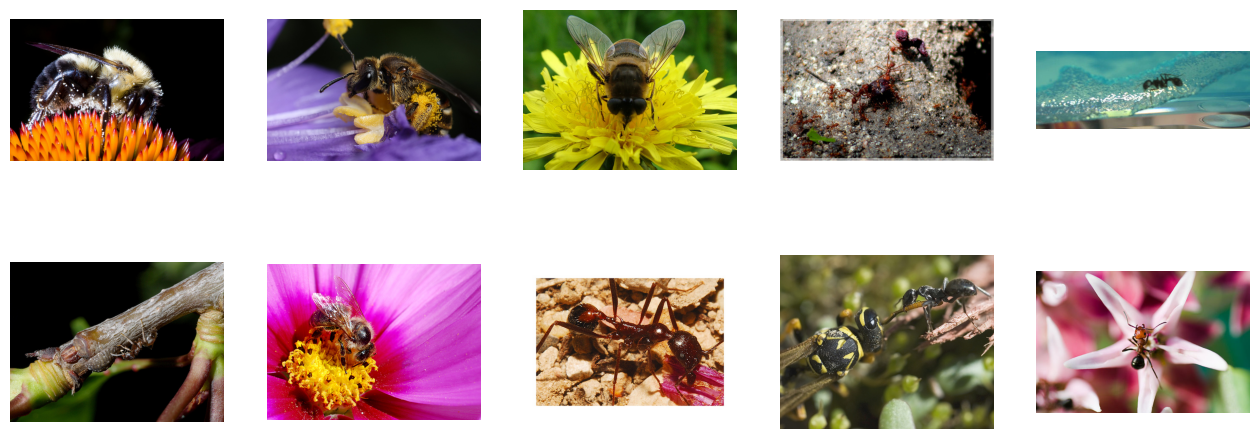

In [4]:
import matplotlib.image as mpimg

# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

Since we have very little training data it makes sense to use some data augmentation for training.

<span style="color:blue">

**Exercise 1**: Change the transforms in the code below in order to add some data augmentation to the training data. See if you can do a random crop instead of always cropping in the middle, and add horizontal flips. Then recreate the datasets and dataloaders.
    
</span>

In [5]:
# CHANGE THE CODE BELOW

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),   # ADD YOUR CODE HERE
        transforms.RandomHorizontalFlip(),          # ADD YOUR CODE HERE
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

Initializing Datasets and Dataloaders...
Done


## Define the training function

The `train_model` function handles the training and validation of a given model. As input, it takes a PyTorch model, a dictionary of dataloaders, a loss function, an optimizer, and a specified number of epochs to train and validate for.

Instead of defining different functions for tranining and validation, we have combined everything into a single one below.

Note that we also have implemented early stopping - we keep track of the performance of our model on the validation set, and we keep a copy of the best model found using Python's `copy.deepcopy()` function. After training finishes, we copy the best weights from the saved model.

In [6]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    acc_history = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    # we will keep a copy of the best weights so far according to validation accuracy
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    losses[phase].append(loss.item())

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).cpu().numpy()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            acc_history[phase].append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, acc_history, losses

## Initialize the ResNet model

We will use the Resnet18 model (the smaller one), as our dataset is small and only has two classes. When we print the model, we see that the last layer is a fully connected layer as shown below:


   `(fc): Linear(in_features=512, out_features=1000, bias=True)`



In [7]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model():
    # Resnet18
    model = models.resnet18()

    input_size = 224

    return model, input_size



# Initialize the model
model, input_size = initialize_model()

# Print the model we just instantiated
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<span style="color:blue">

**Exercise 2**: Modify the function `initialize_model` so that it takes the number of classes `num_classes` as an argument, and it reinitializes `model.fc` to be a Linear layer with 512 input features and `num_classes` output features. Then use the function to create a model with 2 output classes.

</span>

In [8]:
# YOUR CODE HERE!
def initialize_model(num_classes):
    # Resnet18
    model = models.resnet18()

    model.fc = nn.Linear(512, num_classes)

    input_size = 224

    return model, input_size

# Define number of classes
num_classes = 2

# Initialize the model
model, input_size = initialize_model(num_classes)

# Print the model we just instantiated
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Run Training and Validation Step

Let's start by training the model from scratch. What do you think will happen?


In [9]:
# Send the model to GPU
model = model.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate
model, hist, losses = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 1.0906 Acc: 0.5451
val Loss: 1.0691 Acc: 0.5621

Epoch 1/14
----------
train Loss: 0.7133 Acc: 0.5902
val Loss: 0.7281 Acc: 0.6078

Epoch 2/14
----------
train Loss: 0.6780 Acc: 0.5820
val Loss: 0.6533 Acc: 0.6405

Epoch 3/14
----------
train Loss: 0.6812 Acc: 0.6025
val Loss: 0.6944 Acc: 0.6340

Epoch 4/14
----------
train Loss: 0.6288 Acc: 0.6762
val Loss: 0.9007 Acc: 0.5556

Epoch 5/14
----------
train Loss: 0.6183 Acc: 0.6557
val Loss: 0.6931 Acc: 0.6340

Epoch 6/14
----------
train Loss: 0.6562 Acc: 0.6803
val Loss: 0.6529 Acc: 0.6405

Epoch 7/14
----------
train Loss: 0.6743 Acc: 0.6434
val Loss: 0.6423 Acc: 0.6144

Epoch 8/14
----------
train Loss: 0.6086 Acc: 0.6680
val Loss: 0.6220 Acc: 0.6601

Epoch 9/14
----------
train Loss: 0.6512 Acc: 0.6475
val Loss: 0.5883 Acc: 0.6928

Epoch 10/14
----------
train Loss: 0.6453 Acc: 0.6434
val Loss: 0.6329 Acc: 0.6732

Epoch 11/14
----------
train Loss: 0.6222 Acc: 0.6639
val Loss: 0.7250 Acc: 0.6601

Ep

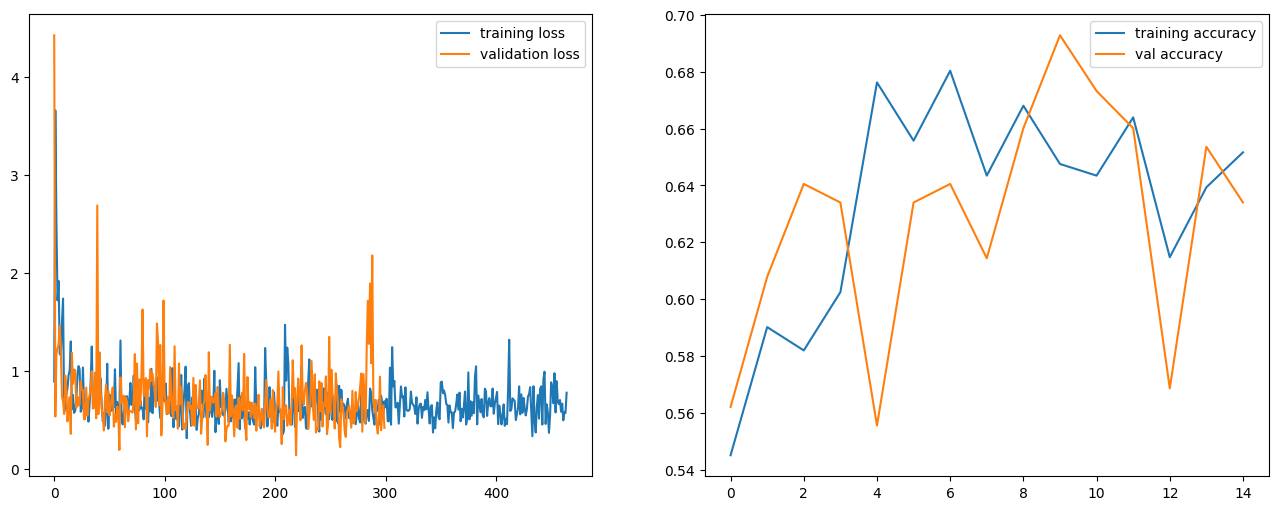

In [10]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses["train"], label="training loss")
ax1.plot(losses["val"], label="validation loss")
ax1.legend()

ax2.plot(hist["train"],label="training accuracy")
ax2.plot(hist["val"],label="val accuracy")
ax2.legend()

plt.show()

Training from scratch with only 100 examples per class does not allow the network to perform very well in this task. It reaches at most 70% accuracy, and the loss seems not to descrease anymore.

## Preparing the model for finetuning and feature extraction

In order to finetune a model or use it for feature extraction, we need to first load the pretrained weights, and then to freeze the part of the model we do not want to change.

In order to load the pretrained weights for the ResNet model we must change a bit more the function `initialize model`. One one hand, we need to load the weights of the pre-trained ResNet model, trained on ImageNet.

Moreover, depending on whether we want to do finetuning (update all parameters of the model) or if we want to do feature extraction (update only the last fully connected layer), we must specify which parameter to update.

The following function sets the `.requires_grad` attribute of all the parameters in the model to False. This way we are freezing the model, since the parameters with `.requires_grad=False` will not be updated during training.


In [11]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False

<span style="color:blue">

**Exercise 3**: Modify the function `initialize_model` so that it takes an extra argument called `finetuning`. If this function is True, then all parameters of the model should be able to update. If it is false, this would mean that we want to do feature extraction, and all parameters of the model should be frozen except the last fully connected layer.
    
In addition, look up the documentation of [`models.resnet18()`](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) and initialise the models with the `DEFAULT` weights.

Then create again your model,
    
</span>

In [14]:
# YOUR CODE HERE
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model(num_classes, finetuning):
    # Resnet18
    model = models.resnet18(weights = 'DEFAULT')
    if (finetuning == 'FALSE'):
        freeze_model(model)

    model.fc = nn.Linear(512, num_classes)

    input_size = 224

    return model, input_size



# Initialize the model
model, input_size = initialize_model(num_classes= 2, finetuning = 'FALSE')

# Print the model we just instantiated
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 92.1MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Create the Optimizer

The final step for finetuning and feature extracting is to create an optimizer that **only** updates the desired parameters. Recall that after loading the pretrained model, if `finetuning == False` (we want to do feature extraction instead) we manually set all of the parameters' `.requires_grad` attributes to False. But the parameters of the reinitialized layer that we add afterwards have `.requires_grad=True` by default. So *all parameters that have `.requires_grad=True` should be optimized*. Next, we make a list of such parameters and input this list to the Adam algorithm constructor.

In [15]:
# Gather the parameters to be optimized/updated in this run. If we are finetuning we will be updating all parameters. However, if we are
# doing feature extract method, we will only update the parameters that we have just initialized, i.e. the parameters with requires_grad is True.

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)


# Now give our optimiser the list of all the parameters that need to be optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

<br>
<span style="color:blue">

**Exercise 4**: Train the model with feature extraction for 15 epochs. This is, you must freeze all parameters except the last fully connected layer. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [16]:
# YOUR CODE HERE
# Load pre-trained model and modify the final layer
feature_extract_model = models.resnet18(pretrained=True)
num_ftrs = feature_extract_model.fc.in_features
feature_extract_model.fc = nn.Linear(num_ftrs, 2)

# Freeze all layers except the last fully connected layer
for param in feature_extract_model.parameters():
    param.requires_grad = False
feature_extract_model.fc.weight.requires_grad = True
feature_extract_model.fc.bias.requires_grad = True

# Send the model to the device
feature_extract_model = feature_extract_model.to(device)

# Define loss function and optimizer
criterion_fe = nn.CrossEntropyLoss()
optimizer_fe = optim.SGD(feature_extract_model.fc.parameters(), lr=0.001, momentum=0.9)

# Train for 15 epochs
model_fe, acc_history_fe, losses_fe = train_model(
    feature_extract_model, dataloaders_dict, criterion_fe, optimizer_fe, num_epochs=15
)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/14
----------


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


train Loss: 0.5417 Acc: 0.6434
val Loss: 0.6752 Acc: 0.6601

Epoch 1/14
----------
train Loss: 0.4642 Acc: 0.7746
val Loss: 0.2309 Acc: 0.9085

Epoch 2/14
----------
train Loss: 0.3850 Acc: 0.8074
val Loss: 0.2134 Acc: 0.9281

Epoch 3/14
----------
train Loss: 0.3253 Acc: 0.8607
val Loss: 0.2276 Acc: 0.9150

Epoch 4/14
----------
train Loss: 0.2859 Acc: 0.8730
val Loss: 0.2034 Acc: 0.9412

Epoch 5/14
----------
train Loss: 0.2308 Acc: 0.9221
val Loss: 0.2624 Acc: 0.8954

Epoch 6/14
----------
train Loss: 0.2927 Acc: 0.8648
val Loss: 0.1875 Acc: 0.9412

Epoch 7/14
----------
train Loss: 0.2395 Acc: 0.9016
val Loss: 0.1957 Acc: 0.9346

Epoch 8/14
----------
train Loss: 0.2747 Acc: 0.8648
val Loss: 0.2038 Acc: 0.9346

Epoch 9/14
----------
train Loss: 0.2571 Acc: 0.8893
val Loss: 0.1912 Acc: 0.9412

Epoch 10/14
----------
train Loss: 0.2515 Acc: 0.8934
val Loss: 0.1954 Acc: 0.9477

Epoch 11/14
----------
train Loss: 0.2782 Acc: 0.9057
val Loss: 0.2006 Acc: 0.9346

Epoch 12/14
----------
t

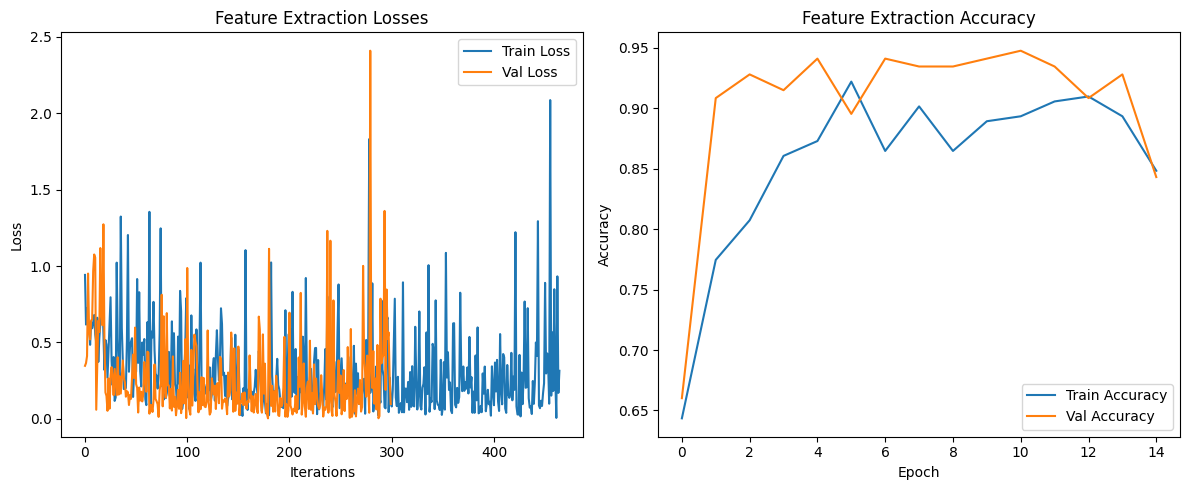

In [17]:
# Plot losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_fe['train'], label='Train Loss')
plt.plot(losses_fe['val'], label='Val Loss')
plt.title("Feature Extraction Losses")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(acc_history_fe['train'], label='Train Accuracy')
plt.plot(acc_history_fe['val'], label='Val Accuracy')
plt.title("Feature Extraction Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


---
The feature extraction model trained in just 41 seconds and achieved a strong best validation accuracy of **94.77%**, demonstrating excellent generalization with minimal training effort.

---

<br>
<span style="color:blue">

**Exercise 5**: Now train the model finetuning all the parameters for 15 epochs. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [18]:
# YOUR CODE HERE
# Load pre-trained model and modify the final layer
finetune_model = models.resnet18(pretrained=True)
num_ftrs = finetune_model.fc.in_features
finetune_model.fc = nn.Linear(num_ftrs, 2)

# All parameters are trainable (fine-tuning)
for param in finetune_model.parameters():
    param.requires_grad = True

# Send the model to the device
finetune_model = finetune_model.to(device)

# Define loss function and optimizer for all params
criterion_ft = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(finetune_model.parameters(), lr=0.001, momentum=0.9)

# Train the model for 15 epochs
model_ft, acc_history_ft, losses_ft = train_model(
    finetune_model, dataloaders_dict, criterion_ft, optimizer_ft, num_epochs=15
)


Epoch 0/14
----------
train Loss: 0.5554 Acc: 0.7090
val Loss: 0.2348 Acc: 0.9216

Epoch 1/14
----------
train Loss: 0.3406 Acc: 0.8648
val Loss: 0.1802 Acc: 0.9216

Epoch 2/14
----------
train Loss: 0.2854 Acc: 0.8811
val Loss: 0.1951 Acc: 0.9346

Epoch 3/14
----------
train Loss: 0.1701 Acc: 0.9344
val Loss: 0.1923 Acc: 0.9412

Epoch 4/14
----------
train Loss: 0.2361 Acc: 0.9057
val Loss: 0.1897 Acc: 0.9412

Epoch 5/14
----------
train Loss: 0.2226 Acc: 0.8893
val Loss: 0.2251 Acc: 0.9216

Epoch 6/14
----------
train Loss: 0.2471 Acc: 0.9016
val Loss: 0.1775 Acc: 0.9412

Epoch 7/14
----------
train Loss: 0.1917 Acc: 0.9098
val Loss: 0.2454 Acc: 0.9085

Epoch 8/14
----------
train Loss: 0.1794 Acc: 0.9139
val Loss: 0.2725 Acc: 0.9150

Epoch 9/14
----------
train Loss: 0.1707 Acc: 0.9508
val Loss: 0.2717 Acc: 0.9281

Epoch 10/14
----------
train Loss: 0.1850 Acc: 0.9344
val Loss: 0.2379 Acc: 0.9412

Epoch 11/14
----------
train Loss: 0.1795 Acc: 0.9057
val Loss: 0.3874 Acc: 0.8758

Ep

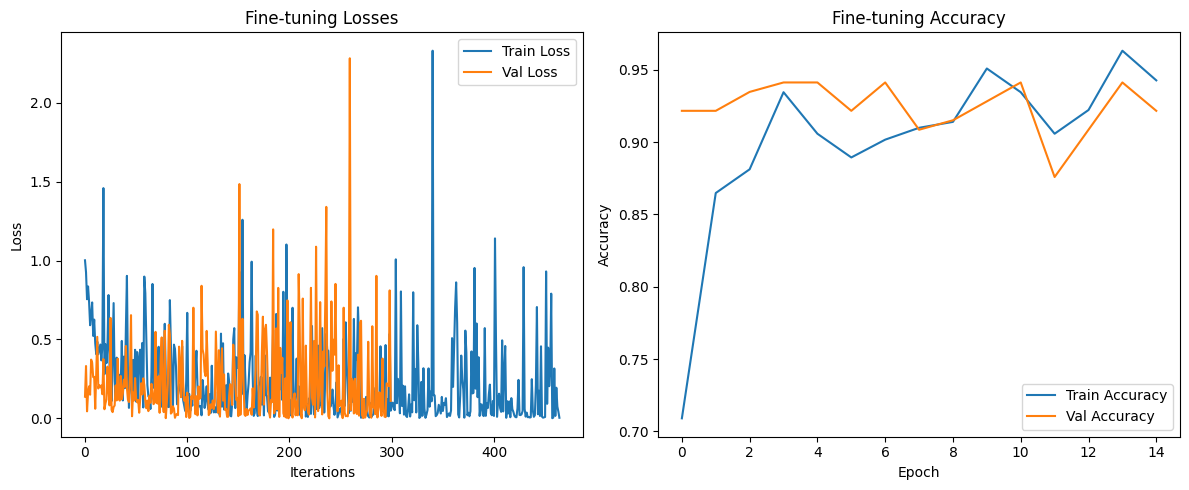

In [19]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_ft['train'], label='Train Loss')
plt.plot(losses_ft['val'], label='Val Loss')
plt.title("Fine-tuning Losses")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(acc_history_ft['train'], label='Train Accuracy')
plt.plot(acc_history_ft['val'], label='Val Accuracy')
plt.title("Fine-tuning Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


---
The fine-tuned ResNet-18 model completed training in 46 seconds 15 epoch and reached a best validation accuracy of **94.12%**, showing strong overall performance and generalization.

The training and validation losses show frequent spikes, especially early in training, indicating some instability in the gradient updates. However, both losses trend downward over time, and validation loss remains low. The accuracy curves are tightly aligned throughout, with training accuracy slightly surpassing validation toward the end—suggesting the model learned the data well without significant overfitting. Overall, fine-tuning led to slightly higher training accuracy but similar generalization compared to feature extraction.

---

<br>
<span style="color:blue">

**Exercise 6**: Plot the  train/val losses and accuracies of all three approaches: training from scratch, finetunning, and festure extraction. To make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.

Make the plot self-explanatory: use legends and titles for each subplot, and a main title for the whole figure.

</span>

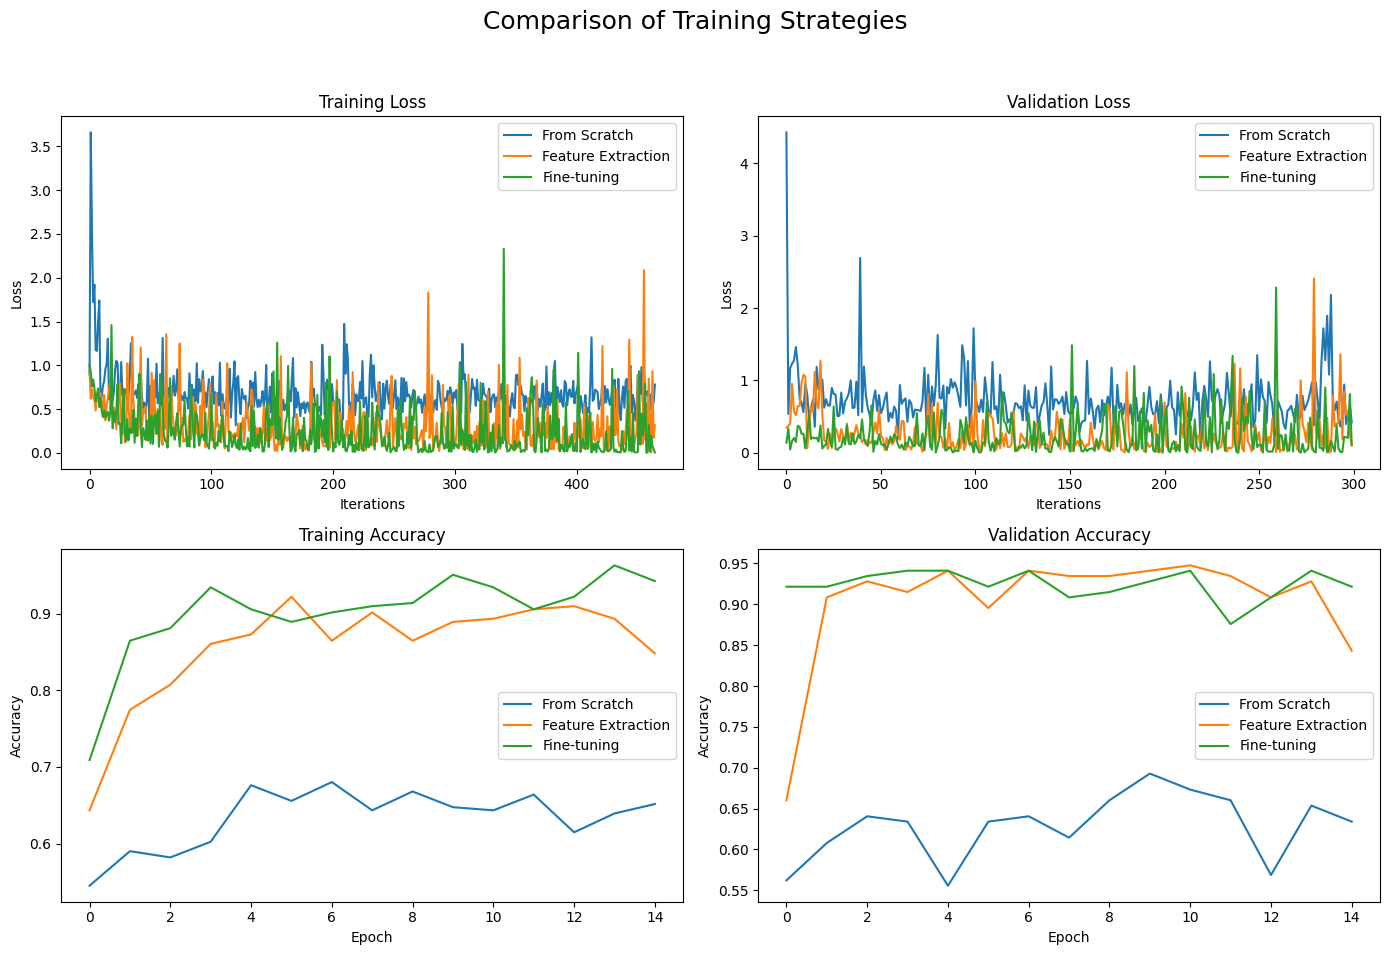

In [21]:
# YOUR CODE HERE
# Store original results if not done already
losses_scratch = losses
acc_history_scratch = hist

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Training Strategies', fontsize=18)

# --- Training Loss ---
axs[0, 0].plot(losses_scratch['train'], label='From Scratch')
axs[0, 0].plot(losses_fe['train'], label='Feature Extraction')
axs[0, 0].plot(losses_ft['train'], label='Fine-tuning')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# --- Validation Loss ---
axs[0, 1].plot(losses_scratch['val'], label='From Scratch')
axs[0, 1].plot(losses_fe['val'], label='Feature Extraction')
axs[0, 1].plot(losses_ft['val'], label='Fine-tuning')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# --- Training Accuracy ---
axs[1, 0].plot(acc_history_scratch['train'], label='From Scratch')
axs[1, 0].plot(acc_history_fe['train'], label='Feature Extraction')
axs[1, 0].plot(acc_history_ft['train'], label='Fine-tuning')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# --- Validation Accuracy ---
axs[1, 1].plot(acc_history_scratch['val'], label='From Scratch')
axs[1, 1].plot(acc_history_fe['val'], label='Feature Extraction')
axs[1, 1].plot(acc_history_ft['val'], label='Fine-tuning')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---
This graph compares the effectiveness of training from scratch, feature extraction, and fine-tuning. Fine-tuning shows the best overall performance, with the lowest training loss and highest training accuracy, indicating strong learning capacity.

Feature extraction performs nearly as well, especially on validation accuracy, showing excellent generalization with fewer trainable parameters. Training from scratch underperforms in both accuracy and loss, reflecting the challenges of learning without pretrained knowledge. Overall, fine-tuning is best, but feature extraction offers a strong and efficient alternative.

---

<br>
<span style="color:blue">

**Exercise 7**: Train the ResNet-18 model for a different dataset (MIT Scenes) using the three training strategies: from scratch (do not load pre-trained weights), finetunning, and feature extraction. Train the model **for 40 epochs** - each training process should take approx. 10 minutes on colab.
    
The URL of the dataset is the following (you also have the file on Campus Virtual):
    
http://pages.cvc.uab.es/dimos/downloads/MIT_scenes.zip

The dataset contains scene images of **8 classes**: coast, forest, highway, inside_city, mountain, open_country, street, and tallbuilding. The number of training images per class varies between 187 and 295.

Train the three models and plot the  train/val losses and accuracies of all of them. Again, to make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.
    
</span>

In [22]:
# YOUR CODE HERE!
class_names = image_datasets['train'].classes
num_classes = len(class_names)


In [23]:
def initialize_model(model_type, num_classes, feature_extract, use_pretrained=True):
    model_ft = models.resnet18(pretrained=use_pretrained)
    if feature_extract:
        for param in model_ft.parameters():
            param.requires_grad = False
    else:
        for param in model_ft.parameters():
            param.requires_grad = True
    model_ft.fc = nn.Linear(model_ft.fc.in_features, num_classes)
    return model_ft.to(device)


In [24]:
# Training from scratch (no pre-trained weights)
model_scratch = initialize_model("resnet", num_classes, feature_extract=False, use_pretrained=False)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
model_scratch, acc_history_scratch, losses_scratch = train_model(model_scratch, dataloaders_dict, criterion, optimizer_scratch, num_epochs=40)

# Feature extraction
model_fe = initialize_model("resnet", num_classes, feature_extract=True, use_pretrained=True)
optimizer_fe = optim.SGD(model_fe.fc.parameters(), lr=0.001, momentum=0.9)
model_fe, acc_history_fe, losses_fe = train_model(model_fe, dataloaders_dict, criterion, optimizer_fe, num_epochs=40)

# Fine-tuning
model_ft = initialize_model("resnet", num_classes, feature_extract=False, use_pretrained=True)
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
model_ft, acc_history_ft, losses_ft = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=40)


Epoch 0/39
----------


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


train Loss: 0.7139 Acc: 0.5164
val Loss: 0.6689 Acc: 0.5752

Epoch 1/39
----------
train Loss: 0.7075 Acc: 0.5861
val Loss: 0.5756 Acc: 0.7190

Epoch 2/39
----------
train Loss: 0.7006 Acc: 0.6066
val Loss: 0.6324 Acc: 0.6928

Epoch 3/39
----------
train Loss: 0.7282 Acc: 0.5779
val Loss: 0.5865 Acc: 0.7320

Epoch 4/39
----------
train Loss: 0.7297 Acc: 0.6107
val Loss: 1.0825 Acc: 0.5294

Epoch 5/39
----------
train Loss: 0.7322 Acc: 0.5861
val Loss: 0.6946 Acc: 0.5752

Epoch 6/39
----------
train Loss: 0.6601 Acc: 0.6230
val Loss: 0.6785 Acc: 0.6013

Epoch 7/39
----------
train Loss: 0.5897 Acc: 0.7090
val Loss: 0.5647 Acc: 0.7255

Epoch 8/39
----------
train Loss: 0.6039 Acc: 0.6803
val Loss: 0.7110 Acc: 0.7059

Epoch 9/39
----------
train Loss: 0.6062 Acc: 0.6762
val Loss: 0.6424 Acc: 0.6601

Epoch 10/39
----------
train Loss: 0.6290 Acc: 0.6270
val Loss: 1.0609 Acc: 0.6209

Epoch 11/39
----------
train Loss: 0.6467 Acc: 0.6680
val Loss: 0.6034 Acc: 0.6667

Epoch 12/39
----------
t

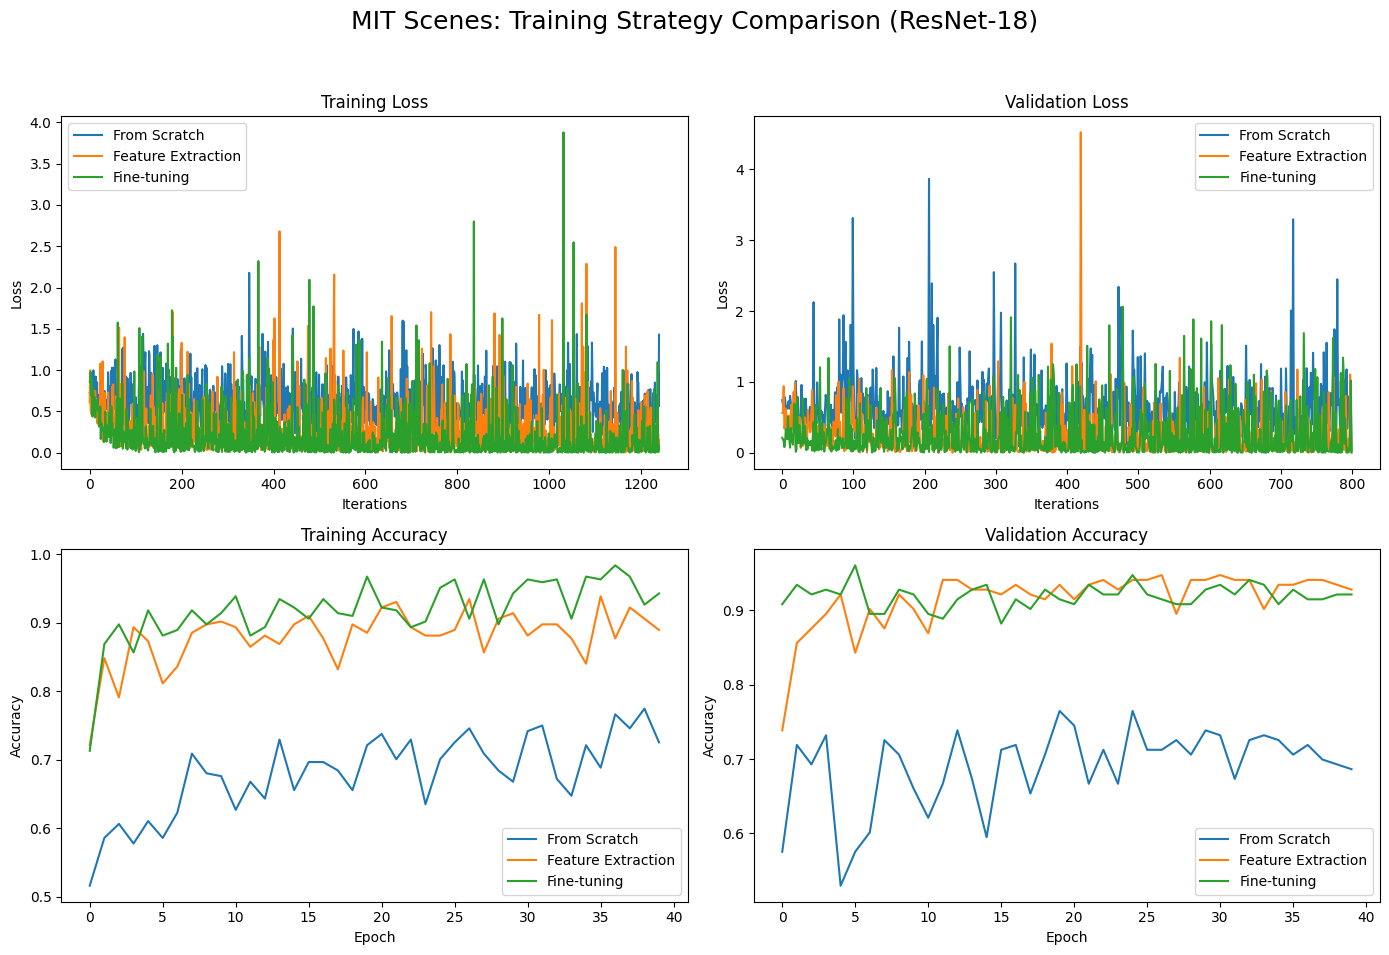

In [25]:
# Plot results
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('MIT Scenes: Training Strategy Comparison (ResNet-18)', fontsize=18)

# Training Loss
axs[0, 0].plot(losses_scratch['train'], label='From Scratch')
axs[0, 0].plot(losses_fe['train'], label='Feature Extraction')
axs[0, 0].plot(losses_ft['train'], label='Fine-tuning')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Validation Loss
axs[0, 1].plot(losses_scratch['val'], label='From Scratch')
axs[0, 1].plot(losses_fe['val'], label='Feature Extraction')
axs[0, 1].plot(losses_ft['val'], label='Fine-tuning')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Training Accuracy
axs[1, 0].plot(acc_history_scratch['train'], label='From Scratch')
axs[1, 0].plot(acc_history_fe['train'], label='Feature Extraction')
axs[1, 0].plot(acc_history_ft['train'], label='Fine-tuning')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Validation Accuracy
axs[1, 1].plot(acc_history_scratch['val'], label='From Scratch')
axs[1, 1].plot(acc_history_fe['val'], label='Feature Extraction')
axs[1, 1].plot(acc_history_ft['val'], label='Fine-tuning')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---
The fine-tuned ResNet-18 model on the MIT Scenes dataset completed training in **2 minutes and 5 seconds** doing 40 epoch and, achieved an impressive best validation accuracy of **96.08%**, confirming the effectiveness of fine-tuning with transfer learning on more complex, multi-class datasets.

In all four plots, **fine-tuning** consistently leads the pack. It shows the lowest training loss, smooth and high training accuracy, and strong validation accuracy with minimal fluctuation. **Feature extraction** also performs very well, slightly below fine-tuning in training accuracy but nearly matching it in validation accuracy. **Training from scratch** shows slower, noisier learning with significantly lower accuracy and higher loss. These results clearly demonstrate that using pretrained weights—especially with fine-tuning—is highly effective for scene classification tasks with limited data.

---

<br>
<span style="color:blue">

**Exercise 7**: Visualize some of the images along with the classification results of your best model.
    
*Hints: (1) The images that the dataloader gives you are already normalised, you need to "de-normalise" them if you want to see the true colours. (2) The order of dimensions of PyTorch is C, H, W, if you want to plot images you need your arrays ordered as H, W, C.*
    
</span>

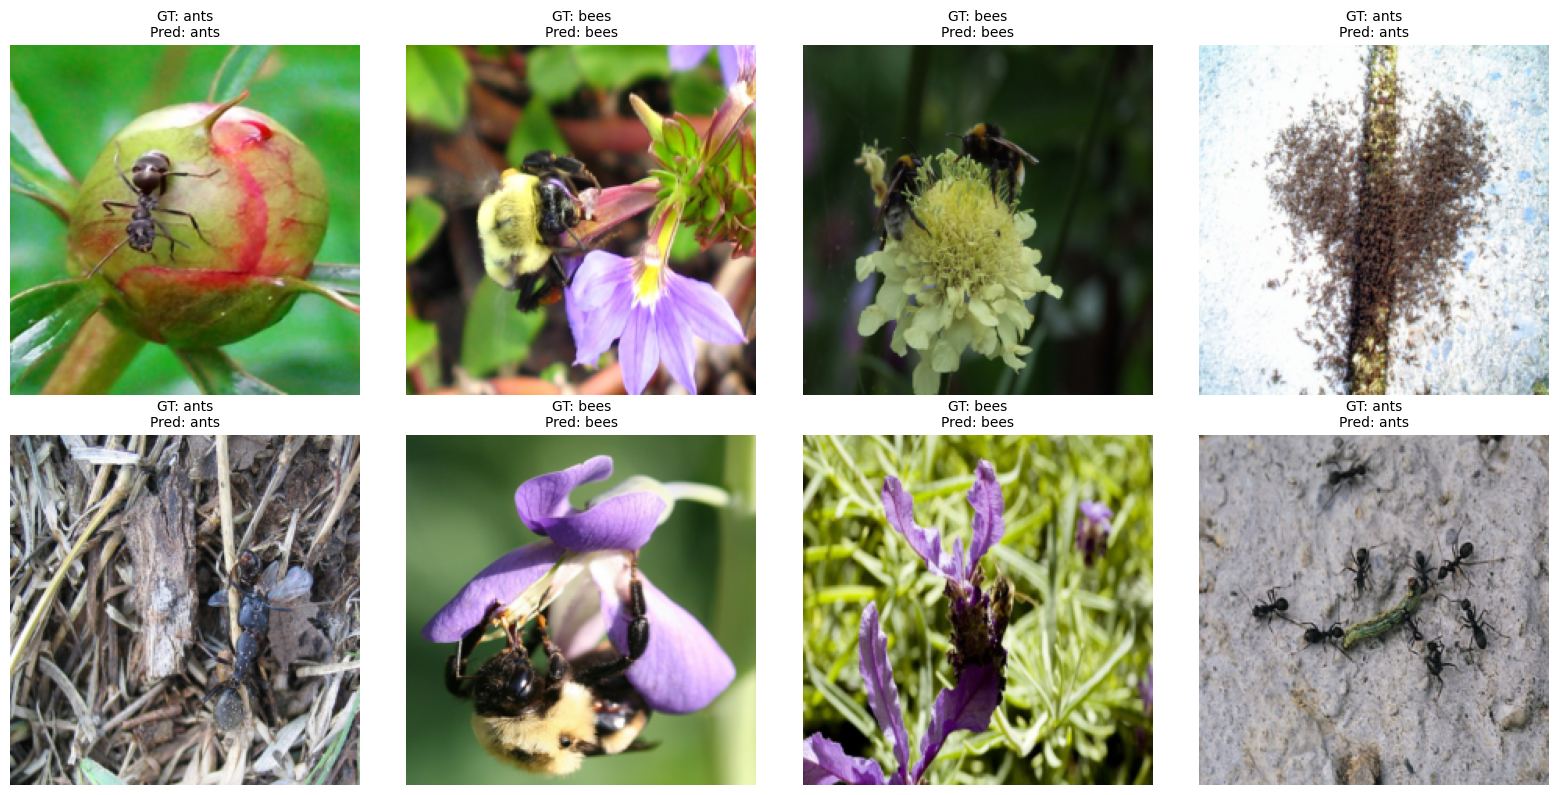

In [26]:
# YOUR CODE HERE!
# Helper to denormalize and display image
def imshow(inp, title=None): #Handles normalization and axis ordering
    inp = inp.numpy().transpose((1, 2, 0))  # from [C, H, W] to [H, W, C]
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # de-normalize
    inp = np.clip(inp, 0, 1)  # clip values for display
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.axis('off')

# Set the model to eval mode
best_model = model_ft  # Change to model_fe or model_scratch
best_model.eval()

# Get a batch of validation data
inputs, classes = next(iter(dataloaders_dict['val']))
inputs = inputs.to(device)

# Make predictions
with torch.no_grad():
    outputs = best_model(inputs)
    _, preds = torch.max(outputs, 1)

# Plot images and predictions
plt.figure(figsize=(16, 8))
for i in range(len(inputs)):
    ax = plt.subplot(2, 4, i + 1)
    imshow(inputs[i].cpu())
    true_label = class_names[classes[i]]
    pred_label = class_names[preds[i]]
    ax.set_title(f"GT: {true_label}\nPred: {pred_label}", fontsize=10)

plt.tight_layout()
plt.show()


---
This image shows a set of classification results where the model correctly predicted every image, with ground truth (GT) and predicted (Pred) labels perfectly aligned. The samples include both **ants** and **bees**, with varied backgrounds and lighting, demonstrating that the model generalizes well across different conditions. The consistent accuracy suggests strong performance and robustness in distinguishing between these two insect classes.

---